In [1]:
#importing necessary libraries 
import numpy as np
import pandas as pd
import warnings 
warnings.filterwarnings('ignore')
#importing libraries for visualisation
import matplotlib as plt
from matplotlib import style
import seaborn as sns

In [2]:
#importing Train and Test Data
data_frame_train=pd.read_csv('./fraudTrain.csv')
data_frame_test=pd.read_csv('./fraudTest.csv')

In [3]:
# Understanding the dimensions of train data
data_frame_train.shape

(1296675, 23)

In [4]:
# Show the top 5 Rows of data
data_frame_train.head(5)

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [5]:
# Understanding the Data Variables
data_frame_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

In [6]:
# Dimensions of train dataset
data_frame_train.shape

(1296675, 23)

In [7]:
# Dimensions of test dataset
data_frame_test.shape

(555719, 23)

In [8]:
# Checking for null values
data_frame_train.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [9]:
# Converting date columns to date time objects
data_frame_train['trans_date_trans_time'] = pd.to_datetime(data_frame_train['trans_date_trans_time'])
data_frame_train['dob']=pd.to_datetime(data_frame_train['dob'])
data_frame_test['trans_date_trans_time'] = pd.to_datetime(data_frame_test['trans_date_trans_time'])
data_frame_test['dob']=pd.to_datetime(data_frame_test['dob'])

In [10]:
# Checking values of street column
data_frame_train.street.value_counts()

street
864 Reynolds Plains                  3123
0069 Robin Brooks Apt. 695           3123
8172 Robertson Parkways Suite 072    3119
4664 Sanchez Common Suite 930        3117
8030 Beck Motorway                   3113
                                     ... 
4940 Donald Throughway Apt. 219         7
7065 Whitney Mountains                  7
5273 Joseph Isle Suite 518              7
9599 Washington Field Suite 238         7
3437 Ross Flat Apt. 592                 7
Name: count, Length: 983, dtype: int64

In [11]:
# Checking values of cc_num column
data_frame_train.cc_num.value_counts()

cc_num
4512828414983801773    3123
571365235126           3123
36722699017270         3119
213112402583773        3117
3545109339866548       3113
                       ... 
4734310647841293          7
4714017207228610634       7
6011732631674654          7
501894933032              7
4975457191020             7
Name: count, Length: 983, dtype: int64

In [12]:
# Checking values of merchant column
data_frame_train.merchant.value_counts()

merchant
fraud_Kilback LLC                       4403
fraud_Cormier LLC                       3649
fraud_Schumm PLC                        3634
fraud_Kuhn LLC                          3510
fraud_Boyer PLC                         3493
                                        ... 
fraud_Douglas, DuBuque and McKenzie      775
fraud_Treutel-King                       775
fraud_Medhurst, Labadie and Gottlieb     759
fraud_Reichert-Weissnat                  753
fraud_Hahn, Douglas and Schowalter       727
Name: count, Length: 693, dtype: int64

In [13]:
# Checking values of city column
data_frame_train.city.value_counts()

city
Birmingham     5617
San Antonio    5130
Utica          5105
Phoenix        5075
Meridian       5060
               ... 
Norfolk           7
Karns City        7
Streator          7
Claypool          7
Bruce             7
Name: count, Length: 894, dtype: int64

In [14]:
# Checking values of category column
data_frame_train.category.value_counts()

category
gas_transport     131659
grocery_pos       123638
home              123115
shopping_pos      116672
kids_pets         113035
shopping_net       97543
entertainment      94014
food_dining        91461
personal_care      90758
health_fitness     85879
misc_pos           79655
misc_net           63287
grocery_net        45452
travel             40507
Name: count, dtype: int64

In [15]:
# Checking values of trans_num column
data_frame_train.trans_num .value_counts()

trans_num
8f7c8e4ab7f25875d753b422917c98c9    1
0b242abb623afc578575680df30655b9    1
1f76529f8574734946361c461b024d99    1
710a88b3b93a13cab79aae87237a3ddf    1
b8a8575d70f33234cb53bb22b50a0fd9    1
                                   ..
6d294ed2cc447d2c71c7171a3d54967c    1
83ec1cc84142af6e2acf10c44949e720    1
189a841a0a8ba03058526bcfe566aab5    1
a41d7549acf90789359a9aa5346dcb46    1
6b849c168bdad6f867558c3793159a81    1
Name: count, Length: 1296675, dtype: int64

In [16]:
# Checking values of job column
data_frame_train.job.value_counts()

job
Film/video editor             9779
Exhibition designer           9199
Naval architect               8684
Surveyor, land/geomatics      8680
Materials engineer            8270
                              ... 
Veterinary surgeon               8
Information officer              8
Contracting civil engineer       7
Ship broker                      7
Warehouse manager                7
Name: count, Length: 494, dtype: int64

In [17]:
# Checking values of unix_time column
data_frame_train.unix_time.value_counts()

unix_time
1335110521    4
1370050667    4
1370177227    4
1330179033    3
1349576597    3
             ..
1325376674    1
1325376754    1
1325376788    1
1325376877    1
1325376308    1
Name: count, Length: 1274823, dtype: int64

In [18]:
# Checking values of trans_date_trans_time column
data_frame_train.trans_date_trans_time.value_counts()

trans_date_trans_time
2019-04-22 16:02:01    4
2020-06-01 01:37:47    4
2020-06-02 12:47:07    4
2019-06-03 01:08:00    3
2019-08-16 15:08:51    3
                      ..
2019-01-01 00:11:14    1
2019-01-01 00:12:34    1
2019-01-01 00:13:08    1
2019-01-01 00:14:37    1
2019-01-01 00:05:08    1
Name: count, Length: 1274791, dtype: int64

In [19]:
# Dropping unwanted columns from Train and Test Datasets
data_frame_train.drop(columns=['Unnamed: 0','trans_num','cc_num','merchant','first','last','street','zip','unix_time'],axis=1,inplace=True)
data_frame_test.drop(columns=['Unnamed: 0','trans_num','cc_num','merchant','first','last','street','zip','unix_time'],axis=1,inplace=True)
data_frame_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 14 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   trans_date_trans_time  1296675 non-null  datetime64[ns]
 1   category               1296675 non-null  object        
 2   amt                    1296675 non-null  float64       
 3   gender                 1296675 non-null  object        
 4   city                   1296675 non-null  object        
 5   state                  1296675 non-null  object        
 6   lat                    1296675 non-null  float64       
 7   long                   1296675 non-null  float64       
 8   city_pop               1296675 non-null  int64         
 9   job                    1296675 non-null  object        
 10  dob                    1296675 non-null  datetime64[ns]
 11  merch_lat              1296675 non-null  float64       
 12  merch_long             12966

In [20]:
# Find value count of 'is_fraud' column
data_frame_train.is_fraud.value_counts()

is_fraud
0    1289169
1       7506
Name: count, dtype: int64

* There are 7506 fraud transactions listed in train data set

#### Data Visualization

<Axes: xlabel='is_fraud'>

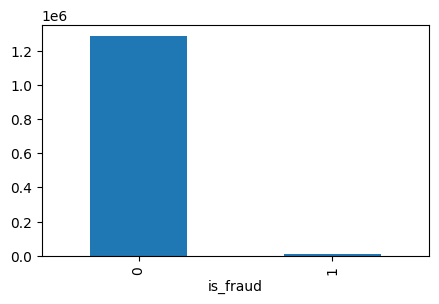

In [21]:
# Plotting histogram of Fraud and non_Fraud transactions
data_frame_train["is_fraud"].value_counts().plot(kind="bar",figsize=(5,3))

<Axes: xlabel='gender', ylabel='Percent'>

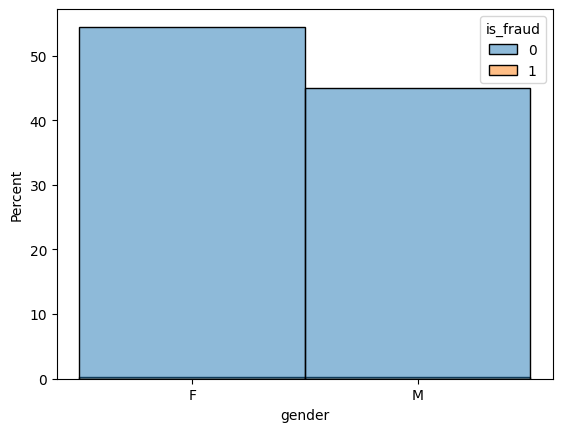

In [22]:
# Plotting Histogram of genderwise fraud transaction count
sns.histplot(data_frame_train,x="gender",hue="is_fraud",stat='percent')

In [23]:
# Combining train and test data sets
data_frame_combined=pd.concat([data_frame_train,data_frame_test])
data_frame_combined.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1852394 entries, 0 to 555718
Data columns (total 14 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   trans_date_trans_time  datetime64[ns]
 1   category               object        
 2   amt                    float64       
 3   gender                 object        
 4   city                   object        
 5   state                  object        
 6   lat                    float64       
 7   long                   float64       
 8   city_pop               int64         
 9   job                    object        
 10  dob                    datetime64[ns]
 11  merch_lat              float64       
 12  merch_long             float64       
 13  is_fraud               int64         
dtypes: datetime64[ns](2), float64(5), int64(2), object(5)
memory usage: 212.0+ MB


In [24]:
# Finding the exact 'hours' in which transactions takes place
data_frame_combined['hour']=data_frame_combined['trans_date_trans_time'].dt.hour
data_frame_combined.head(2)

,trans_date_trans_time,category,amt,gender,city,state,lat,long,city_pop,job,dob,merch_lat,merch_long,is_fraud,hour
0,2019-01-01 00:00:18,misc_net,4.97,F,Moravian Falls,NC,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,36.011293,-82.048315,0,0
1,2019-01-01 00:00:44,grocery_pos,107.23,F,Orient,WA,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,49.159047,-118.186462,0,0


In [25]:
# Finding unique values in 'hour' column
data_frame_combined['hour'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23], dtype=int32)

In [26]:
# Finding unique value counts in 'hour' column
data_frame_combined['hour'].value_counts()

hour
23    95902
22    95370
16    94289
18    94052
21    93738
17    93514
13    93492
15    93439
19    93433
12    93294
14    93089
20    93081
1     61330
3     60968
2     60796
0     60655
8     60498
6     60406
10    60320
7     60301
9     60231
11    60170
5     60088
4     59938
Name: count, dtype: int64

<Axes: xlabel='hour'>

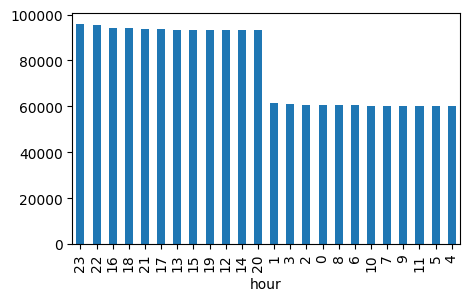

In [27]:
# Plotting histogram of transaction hours
data_frame_combined["hour"].value_counts().plot(kind="bar",figsize=(5,3))

<Axes: xlabel='hour', ylabel='count'>

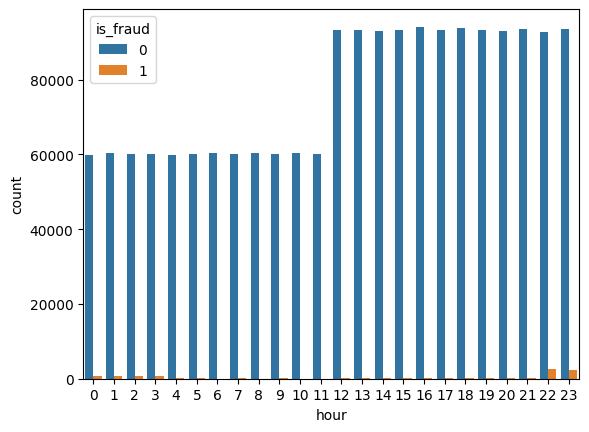

In [28]:
# Plotting transaction hours of fraud and non-fraud transactions
sns.countplot(data_frame_combined,x='hour',hue='is_fraud')

* Most of transactions occured between 12:00 and 23:00
* Most of fraudulent transactions happened in time zone 22:00 pm and 23:00  , then during 0:00 and 3:00

In [29]:
# Finding date of birth year and the year in which transaction was done
data_frame_combined['year']=data_frame_combined['trans_date_trans_time'].dt.year
data_frame_combined['dob year']=data_frame_combined['dob'].dt.year
data_frame_combined.head(2)

,trans_date_trans_time,category,amt,gender,city,state,lat,long,city_pop,job,dob,merch_lat,merch_long,is_fraud,hour,year,dob year
0,2019-01-01 00:00:18,misc_net,4.97,F,Moravian Falls,NC,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,36.011293,-82.048315,0,0,2019,1988
1,2019-01-01 00:00:44,grocery_pos,107.23,F,Orient,WA,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,49.159047,-118.186462,0,0,2019,1978


In [30]:
data_frame_combined.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1852394 entries, 0 to 555718
Data columns (total 17 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   trans_date_trans_time  datetime64[ns]
 1   category               object        
 2   amt                    float64       
 3   gender                 object        
 4   city                   object        
 5   state                  object        
 6   lat                    float64       
 7   long                   float64       
 8   city_pop               int64         
 9   job                    object        
 10  dob                    datetime64[ns]
 11  merch_lat              float64       
 12  merch_long             float64       
 13  is_fraud               int64         
 14  hour                   int32         
 15  year                   int32         
 16  dob year               int32         
dtypes: datetime64[ns](2), float64(5), int32(3), int64(2), object(5)
memory 

In [31]:
# Find the approximate age of persons included in dataset
data_frame_combined['age']=data_frame_combined['year']-data_frame_combined['dob year']
data_frame_combined.drop(columns=['year','dob year'],axis=1,inplace=True)
data_frame_combined.head(2)

,trans_date_trans_time,category,amt,gender,city,state,lat,long,city_pop,job,dob,merch_lat,merch_long,is_fraud,hour,age
0,2019-01-01 00:00:18,misc_net,4.97,F,Moravian Falls,NC,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,36.011293,-82.048315,0,0,31
1,2019-01-01 00:00:44,grocery_pos,107.23,F,Orient,WA,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,49.159047,-118.186462,0,0,41


In [32]:
# Drop columns 'trans_date_trans_time' and 'dob' as we have derived enough data from them
data_frame_combined.drop(columns=['trans_date_trans_time','dob'],axis=1,inplace=True)

In [33]:
# One hot encoding variables
data_frame_combined= pd.get_dummies(data_frame_combined,columns=['gender'])
data_frame_combined= pd.get_dummies(data_frame_combined,columns=['category'])
data_frame_combined.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1852394 entries, 0 to 555718
Data columns (total 28 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   amt                      float64
 1   city                     object 
 2   state                    object 
 3   lat                      float64
 4   long                     float64
 5   city_pop                 int64  
 6   job                      object 
 7   merch_lat                float64
 8   merch_long               float64
 9   is_fraud                 int64  
 10  hour                     int32  
 11  age                      int32  
 12  gender_F                 bool   
 13  gender_M                 bool   
 14  category_entertainment   bool   
 15  category_food_dining     bool   
 16  category_gas_transport   bool   
 17  category_grocery_net     bool   
 18  category_grocery_pos     bool   
 19  category_health_fitness  bool   
 20  category_home            bool   
 21  category_kids_

In [34]:
# Show the top 5 rows of new dataset
data_frame_combined.head(5)

,amt,city,state,lat,long,city_pop,job,merch_lat,merch_long,is_fraud,...,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel
0,4.97,Moravian Falls,NC,36.0788,-81.1781,3495,"Psychologist, counselling",36.011293,-82.048315,0,...,False,False,False,False,True,False,False,False,False,False
1,107.23,Orient,WA,48.8878,-118.2105,149,Special educational needs teacher,49.159047,-118.186462,0,...,True,False,False,False,False,False,False,False,False,False
2,220.11,Malad City,ID,42.1808,-112.2620,4154,Nature conservation officer,43.150704,-112.154481,0,...,False,False,False,False,False,False,False,False,False,False
3,45.00,Boulder,MT,46.2306,-112.1138,1939,Patent attorney,47.034331,-112.561071,0,...,False,False,False,False,False,False,False,False,False,False
4,41.96,Doe Hill,VA,38.4207,-79.4629,99,Dance movement psychotherapist,38.674999,-78.632459,0,...,False,False,False,False,False,True,False,False,False,False


In [35]:
# Identifing Numerical Columns in Dataset
data_frame_combined=data_frame_combined.select_dtypes(include=['float64','int64','uint8'])
data_frame_combined.columns

Index(['amt', 'lat', 'long', 'city_pop', 'merch_lat', 'merch_long',
       'is_fraud'],
      dtype='object')

#### Splitting the combined dataset for training and testing

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
#First step in building the model is to identify the Feature(Input) variables and Target (Output) variable
features_combined=data_frame_combined.drop(["is_fraud"],axis=1)
target_combined=data_frame_combined["is_fraud"]

In [38]:
# Splitting data for training the model and testing the model
# train size taken as 0.8
X_train,X_test,y_train,y_test=train_test_split(features_combined,target_combined,train_size=0.7)
# Dimensions of 'New' Train and Test Data sets
print('Dimensions of Newly formed Train Dataset features :',X_train.shape)
print('Dimensions of Newly formed Test Dataset Features : ',X_test.shape)
print('Dimensions of Target for Newly formed Train dataset: ',y_train.shape)
print('Dimensions of Target for Newly formed Test dataset: ' ,y_test.shape)

Dimensions of Newly formed Train Dataset features : (1296675, 6)
Dimensions of Newly formed Test Dataset Features :  (555719, 6)
Dimensions of Target for Newly formed Train dataset:  (1296675,)
Dimensions of Target for Newly formed Test dataset:  (555719,)


In [39]:
from imblearn.over_sampling import SMOTE
smote=SMOTE()
x_sm,y_sm = smote.fit_resample(X_train.astype('float'), y_train)

In [40]:
# Dimensions after application of SMOTE
x_sm.shape
y_sm.shape

(2579982,)

In [41]:
# Learn the Logistic Regression Model on train data
from sklearn.linear_model import LogisticRegression
my_model_LR=LogisticRegression()

In [42]:
# Fitting the model in train data set ie the  Logistic Regression Model should learn from the Train Data
my_model_LR=my_model_LR.fit(x_sm,y_sm)

In [43]:
# Predicting fraud/Non-fraud transactions from Feature Test values
y_pred_LR = my_model_LR.predict(X_test)
y_pred_LR 

array([0, 0, 1, ..., 0, 1, 0])

#### Testing the Logistic Regression Model

In [44]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

In [45]:
# find Accurancy Score = (TP+TN)/(TP+TN+FP+FN)
accuracy_score(y_test, y_pred_LR)

0.9492225387291059

In [46]:
# find Precision Score= TP/(TP+FP)
precision_score(y_test, y_pred_LR)

np.float64(0.07577030341722388)

In [47]:
# Recall = TP/(TP+FN)
# Recall gives the percentage of positives well predicted by our model.
recall_score(y_test, y_pred_LR)

np.float64(0.7600269632625548)

In [48]:
# f1_score= (Precition * Recall )/ (Precition + Recall)
f1_score(y_test, y_pred_LR)

np.float64(0.13780249327792715)

In [49]:
from sklearn.tree import DecisionTreeClassifier
my_model_DT=DecisionTreeClassifier(max_depth=10,random_state = 0)

In [50]:
# Fitting the DT model in train data set 
my_model_DT=my_model_DT.fit(x_sm,y_sm)

In [51]:
# Predicting fraud/Non-fraud transactions from Feature Test values
y_pred_DT=my_model_DT.predict(X_test)
y_pred_DT

array([0, 1, 1, ..., 0, 0, 0])

In [52]:
accuracy_score(y_test,y_pred_DT)

0.904586670601509

In [53]:
precision_score(y_test,y_pred_DT)

np.float64(0.04573834761144185)

In [54]:
recall_score(y_test,y_pred_DT)

np.float64(0.8493427704752275)

In [55]:
f1_score(y_test,y_pred_DT)

np.float64(0.08680226650362537)

In [56]:
from sklearn.ensemble import RandomForestClassifier
my_model_RF=RandomForestClassifier(random_state=10)

In [57]:
# Fitting the Random Forest Classifier model in train data set
my_model_RF=my_model_RF.fit(x_sm,y_sm)

In [58]:
# Predicting fraud/Non-fraud transactions from Feature Test values
y_pred_RF=my_model_RF.predict(X_test)
y_pred_RF

array([0, 0, 1, ..., 0, 0, 0])

In [59]:
accuracy_score(y_test, y_pred_RF)

0.9869898275927222

In [60]:
precision_score(y_test, y_pred_RF)

np.float64(0.2242918121847109)

In [61]:
recall_score(y_test, y_pred_RF)

np.float64(0.5844287158746209)

In [62]:
f1_score(y_test, y_pred_RF)

np.float64(0.32417274256870443)

In [63]:
from joblib import dump, load
dump(my_model_DT, 'credit_dt.joblib')
dump(my_model_RF, 'credit_rf.joblib')
dump(my_model_LR, 'credit_lr.joblib')

['credit_lr.joblib']